__11/12/2020__

Beatriz Cárdaba Rico

Sara Bengoechea Rodríguez

# Support Vector Machine:

SVM es un clasificador discriminatorio definido formalmente por un hiperplano de separación. En otras palabras, dados datos de entrenamiento etiquetados (aprendizaje supervisado), el algoritmo da como resultado un hiperplano óptimo que categoriza nuevos ejemplos. En el espacio bidimensional este hiperplano es una línea que divide un plano en dos partes donde en cada clase se encuentran en cada lado.

Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama __vector soporte__. Cuando las nuevas muestras se ponen en correspondencia con dicho modelo, en función de los espacios a los que pertenezcan, pueden ser clasificadas a una o la otra clase.

Este notebook consta de la siguiente estructura:

- Library Import
- Data Import
- Model Definition
- Model Training
- Confussion Matrix & Accuracy
- ROC Curve
- References

__Importamos todas las librerías que se van a utilizar en este notebook:__

In [4]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing 
from sklearn.linear_model import Lasso, LassoCV
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # SVM
from sklearn import svm

__Importamos los datos:__

In [5]:
X_train = pd.read_csv('../data/03_processed/x_train.csv')
X_train.head()

,Unnamed: 0,num_rev_accts,open_acc_6m,num_bc_tl,home_ownership_ANY,tot_hi_cred_lim,home_ownership_MORTGAGE,home_ownership_OWN,purpose_leisure,num_actv_bc_tl,...,funded_amnt,pct_tl_nvr_dlq,inq_last_6mths,loan_amnt,bc_open_to_buy,num_tl_30dpd,num_op_rev_tl,term_ 60 months,open_acc,total_rev_hi_lim
0,0,0.100000,0.0,0.114286,0.0,0.019016,1.0,0.0,0.0,0.100000,...,0.333333,1.000000,0.000000,0.333333,0.000491,0.0,0.084337,0.0,0.100000,0.00234
1,1,0.027273,0.0,0.028571,0.0,0.006348,0.0,0.0,0.0,0.066667,...,0.275000,0.925140,0.166667,0.275000,0.006551,0.0,0.060241,0.0,0.144444,0.00122
2,2,0.072727,0.0,0.071429,0.0,0.033903,1.0,0.0,0.0,0.133333,...,0.179487,1.000000,0.000000,0.179487,0.024284,0.0,0.060241,0.0,0.100000,0.00283
3,3,0.127273,0.0,0.114286,0.0,0.005288,0.0,0.0,0.0,0.100000,...,0.102564,0.731844,0.000000,0.102564,0.003751,0.0,0.060241,0.0,0.111111,0.00073
4,4,0.318182,0.0,0.257143,0.0,0.008973,1.0,0.0,0.0,0.100000,...,0.102564,1.000000,0.166667,0.102564,0.002182,0.0,0.072289,0.0,0.088889,0.00169


Se observa que se han generado una columna adicional y la eliminamos

In [6]:
del X_train['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [7]:
X_test = pd.read_csv('../data/03_processed/x_test.csv')
X_test.head(1)

,Unnamed: 0,num_rev_accts,open_acc_6m,num_bc_tl,home_ownership_ANY,tot_hi_cred_lim,home_ownership_MORTGAGE,home_ownership_OWN,purpose_leisure,num_actv_bc_tl,...,funded_amnt,pct_tl_nvr_dlq,inq_last_6mths,loan_amnt,bc_open_to_buy,num_tl_30dpd,num_op_rev_tl,term_ 60 months,open_acc,total_rev_hi_lim
0,137093,0.118182,0.0,0.1,0.0,0.005378,0.0,0.0,0.0,0.066667,...,0.333333,0.840223,0.0,0.333333,0.007237,0.0,0.060241,0.0,0.077778,0.00255


In [8]:
del X_test['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [9]:
Y_train = pd.read_csv('../data/03_processed/y_train.csv')
Y_train.head()

,Unnamed: 0,target
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [10]:
del Y_train['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [11]:
Y_test = pd.read_csv('../data/03_processed/y_test.csv')
Y_test.head(1)

,Unnamed: 0,target
0,137093,0.0


In [12]:
del Y_test['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

__Difinimos la función SVM:__

En primer lugar valoramos un kernel linear ya que es el más sencillo vamos a comprobar como responde, y en caso de que no sea un resultado ótimo aplicaremos otro tipo de kernel.

El SVM lineal es un algoritmo de machine learning para resolver problemas de clasificación de clases. Se utiliza cuando los datos son separables linealmente, es decir, se pueden separar usando una sola línea. Es muy útil cuando hay un gran número de características en un conjunto de datos en particular. 

In [15]:

%%time
#Creamos svm Classifier
SVM_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM_model.fit(X_train, Y_train.values)

#Predecimos el valor de Y para los datos de TEST
Y_pred = SVM_model.predict(X_test)

C:\Users\Beatriz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Wall time: 1h 9min 53s


### Matriz de Confusión:
La matriz de confusión de un problema de clase n es una matríz nxnen la que las filas se nombran según las clases reales y las columnas, según las clases previstas por el modelo. Sirve para mostrar de forma explícita cuándo una clase es confundida con otra

__Accuracy:__ Es el porcentaje total de elementos clasificados correctamente.

In [16]:

def conf_matrix(Y_test, Y_pred): # va a comparar los resultados de las predicciones de la variable target vs la real del testset
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, without normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     69140
         1.0       0.81      0.80      0.80     23299

    accuracy                           0.90     92439
   macro avg       0.87      0.87      0.87     92439
weighted avg       0.90      0.90      0.90     92439



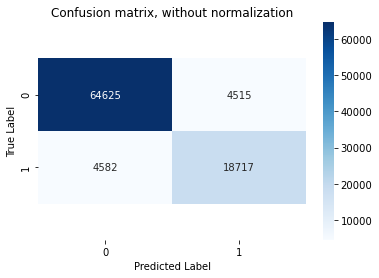

In [17]:
conf_matrix(Y_test, Y_pred)                 # para la matriz de confusión usamos los datos de test
print(classification_report(Y_test,Y_pred)) # comparamos los restulados de la prediccion y los dados por el dataset Y_test

In [18]:
def conf_matrix_norm(Y_test, Y_pred): # va a comparar los resultados de las predicciones de la variable target vs la real del testset
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred,  normalize='true')
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, without normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     69140
         1.0       0.81      0.80      0.80     23299

    accuracy                           0.90     92439
   macro avg       0.87      0.87      0.87     92439
weighted avg       0.90      0.90      0.90     92439



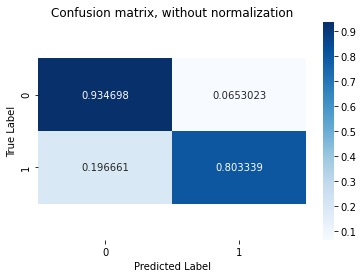

In [19]:
conf_matrix_norm(Y_test, Y_pred)                 # para la matriz de confusión usamos los datos de test
print(classification_report(Y_test,Y_pred)) # comparamos los restulados de la prediccion y los dados por el dataset Y_test

### Curva ROC:

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:
 - Tasa de verdaderos positivos
 - Tasa de falsos positivos
 
__El AUC__ proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

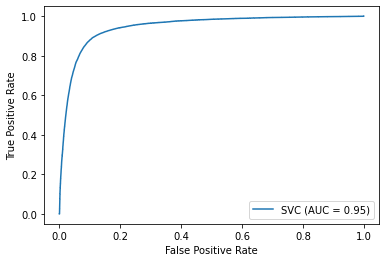

SVM score train:  0.8989512369098446
SVM score:  0.9015891560921256


In [20]:
metrics.plot_roc_curve(SVM_model, X_test, Y_test)             # CURVA ROC
plt.show()                     
print("SVM score train: ", SVM_model.score(X_train, Y_train)) # score_train
print("SVM score: ", SVM_model.score(X_test, Y_test))         # score_test

### Gain Curve:
Se utiliza para evaluar el rendimiento del modelo de clasificación. Miden como un modelo es capaz de mejorar una predicción aleatoria, es decir cómo es de útil el modelo para predecir valores

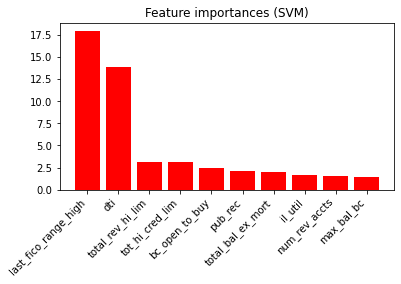

In [21]:
coefs = np.abs(SVM_model.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (SVM)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [22]:
# función para guardar el modelo
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [23]:
save_models('../data/04_models/svm_model.pkl', SVM_model) # ruta y modelo guradado IMP .plk

### Referencias:
- https://empresas.blogthinkbig.com/ml-a-tu-alcance-matriz-confusion/
- https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/
- https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://www.cienciadedatos.net/documentos/34_maquinas_de_vector_soporte_support_vector_machines
- https://rpubs.com/Joaquin_AR/267926